In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Football Players Stats (2025-2026)
## Player statistics from the 2025-2026 season from the top 5 European Leagues.
### Link: https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2025-2026

## Basic Player Information
- **Player** – Player's name  
- **Nation** – Player's nationality  
- **Pos** – Position (FW, MF, DF, GK)  
- **Squad** – Club name  
- **Comp** – League  
- **Age** – Age of the player  
- **Born** – Year of birth  

## Playing Time & Appearances
- **MP** – Matches played  
- **Starts** – Games started  
- **Min** – Minutes played  
- **90s** – Number of full 90-minute matches played  

## Attacking Stats
- **Gls** – Goals scored  
- **Ast** – Assists provided  
- **G+A** – Goals + Assists  
- **xG** – Expected goals  
- **xAG** – Expected assists  
- **npxG** – Non-penalty expected goals  
- **G-PK** – Goals excluding penalties  

## Defensive Stats
- **Tkl** – Total tackles  
- **TklW** – Tackles won  
- **Blocks** – Blocks made  
- **Int** – Interceptions  
- **Tkl+Int** – Combined tackles and interceptions  
- **Clr** – Clearances  
- **Err** – Errors leading to goals  

## Passing & Creativity Stats
- **PrgP** – Progressive passes  
- **PrgC** – Progressive carries  
- **KP** – Key passes (passes leading to a shot)  
- **Cmp%_stats_passing** – Pass completion percentage  
- **Ast_stats_passing** – Assists  
- **xA** – Expected assists  
- **PPA** – Passes into the penalty area  

## Goalkeeping Stats
- **GA** – Goals conceded  
- **Saves** – Saves made  
- **Save%** – Save percentage  
- **CS** – Clean sheets  
- **CS%** – Clean sheet percentage  
- **PKA** – Penalties faced  
- **PKsv** – Penalty saves  

## Possession & Ball Control
- **Touches** – Total touches of the ball  
- **Carries** – Total ball carries  
- **PrgR** – Progressive runs (carries moving the ball forward significantly)  
- **Mis** – Miscontrols  
- **Dis** – Times dispossessed  

## Miscellaneous Stats
- **CrdY** – Yellow cards  
- **CrdR** – Red cards  
- **PKwon** – Penalties won  
- **PKcon** – Penalties conceded  
- **Recov** – Ball recoveries  


In [80]:
data = pd.read_csv('data/players_data-2025_2026.csv')
data

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Brenden Aaronson,us USA,FW,Leeds United,eng Premier League,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jones El-Abdellaoui,ma MAR,"MF,DF",Celta Vigo,es La Liga,19.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Himad Abdelli,dz ALG,MF,Angers,fr Ligue 1,25.0,1999.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Salis Abdul Samed,gh GHA,MF,Nice,fr Ligue 1,25.0,2000.0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Saud Abdulhamid,sa KSA,DF,Lens,fr Ligue 1,26.0,1999.0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1982,Yanis Zouaoui,dz ALG,DF,Le Havre,fr Ligue 1,31.0,1994.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,1983,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,28.0,1997.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,1984,Martín Zubimendi,es ESP,MF,Arsenal,eng Premier League,26.0,1999.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1985,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,26.0,1998.0,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
real_madrid = data[data['Squad'] == 'Real Madrid']
rm_defenders = real_madrid[real_madrid['Pos'] == 'DF']

In [82]:
rm_defenders

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
49,50,David Alaba,at AUT,DF,Real Madrid,es La Liga,33.0,1992.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,55,Trent Alexander-Arnold,eng ENG,DF,Real Madrid,es La Liga,26.0,1998.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,106,Raúl Asencio,es ESP,DF,Real Madrid,es La Liga,22.0,2003.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,335,Álvaro Carreras,es ESP,DF,Real Madrid,es La Liga,22.0,2003.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,336,Dani Carvajal,es ESP,DF,Real Madrid,es La Liga,33.0,1992.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,832,Dean Huijsen,es ESP,DF,Real Madrid,es La Liga,20.0,2005.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,1232,Éder Militão,br BRA,DF,Real Madrid,es La Liga,27.0,1998.0,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,1589,Antonio Rüdiger,de GER,DF,Real Madrid,es La Liga,32.0,1993.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


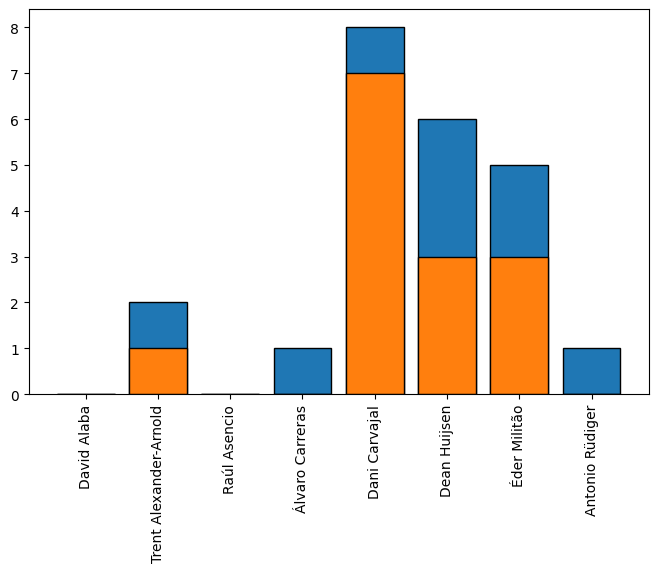

In [83]:
plt.figure(figsize=(8, 5))
plt.bar(rm_defenders.Player, rm_defenders.Tkl, edgecolor='black')
plt.bar(rm_defenders.Player, rm_defenders.TklW, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

In [84]:
liverpool = data[data['Squad'] == 'Liverpool']
liverpool_defenders = liverpool[liverpool['Pos'] == 'DF']
liverpool_defenders

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
251,252,Conor Bradley,nir NIR,DF,Liverpool,eng Premier League,22.0,2003.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,644,Jeremie Frimpong,nl NED,DF,Liverpool,eng Premier League,24.0,2000.0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,711,Joe Gomez,eng ENG,DF,Liverpool,eng Premier League,28.0,1997.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,951,Milos Kerkez,hu HUN,DF,Liverpool,eng Premier League,21.0,2003.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,977,Ibrahima Konaté,fr FRA,DF,Liverpool,eng Premier League,26.0,1999.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,1553,Andrew Robertson,sct SCO,DF,Liverpool,eng Premier League,31.0,1994.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,1871,Virgil van Dijk,nl NED,DF,Liverpool,eng Premier League,34.0,1991.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


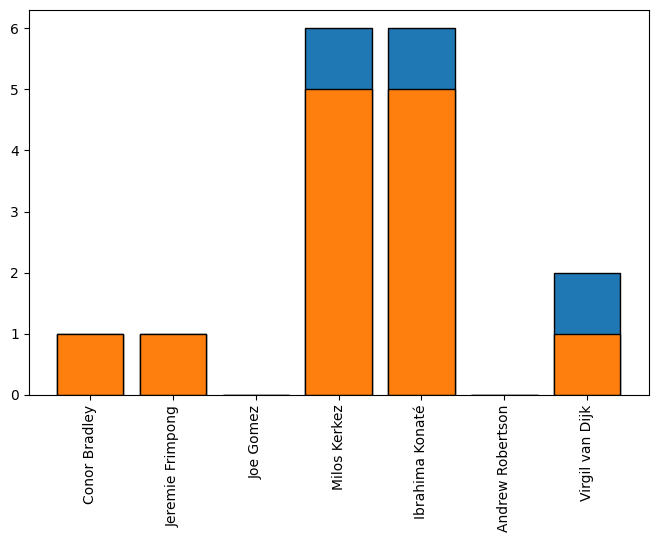

In [85]:
plt.figure(figsize=(8, 5))
plt.bar(liverpool_defenders.Player, liverpool_defenders.Tkl, edgecolor='black')
plt.bar(liverpool_defenders.Player, liverpool_defenders.TklW, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

In [89]:
defenders = data[(data['Squad'].isin(['Real Madrid', 'Liverpool'])) & (data['Pos'] == 'DF')]
defenders

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
49,50,David Alaba,at AUT,DF,Real Madrid,es La Liga,33.0,1992.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,55,Trent Alexander-Arnold,eng ENG,DF,Real Madrid,es La Liga,26.0,1998.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,106,Raúl Asencio,es ESP,DF,Real Madrid,es La Liga,22.0,2003.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,252,Conor Bradley,nir NIR,DF,Liverpool,eng Premier League,22.0,2003.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,335,Álvaro Carreras,es ESP,DF,Real Madrid,es La Liga,22.0,2003.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,336,Dani Carvajal,es ESP,DF,Real Madrid,es La Liga,33.0,1992.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,644,Jeremie Frimpong,nl NED,DF,Liverpool,eng Premier League,24.0,2000.0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,711,Joe Gomez,eng ENG,DF,Liverpool,eng Premier League,28.0,1997.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,832,Dean Huijsen,es ESP,DF,Real Madrid,es La Liga,20.0,2005.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,951,Milos Kerkez,hu HUN,DF,Liverpool,eng Premier League,21.0,2003.0,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


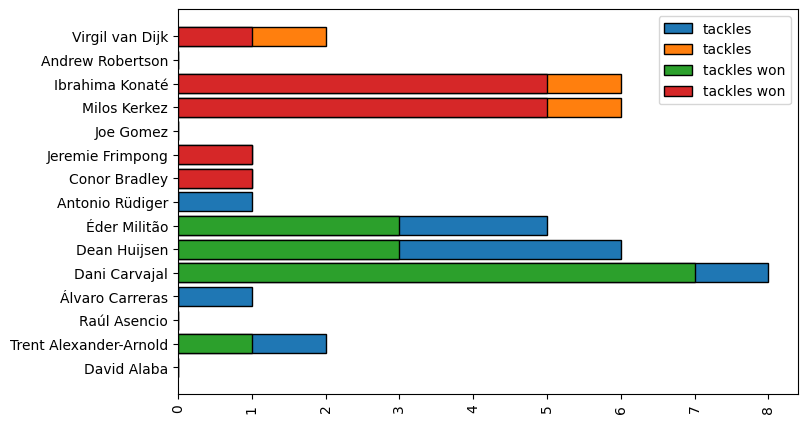

In [98]:
rm_def = defenders[defenders['Squad'] == 'Real Madrid']
liv_def = defenders[defenders['Squad'] == 'Liverpool']

plt.figure(figsize=(8, 5))

plt.barh(rm_def.Player, rm_def.Tkl, edgecolor='black', label='tackles')
plt.barh(liv_def.Player, liv_def.Tkl, edgecolor='black', label='tackles')

plt.barh(rm_def.Player, rm_def.TklW, edgecolor='black', label='tackles won')
plt.barh(liv_def.Player, liv_def.TklW, edgecolor='black', label='tackles won')

plt.legend()
plt.xticks(rotation=90)
plt.show()